In [1]:

import os
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import timecorr as tc
import scipy.spatial.distance as sd
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine, vec2mat
%matplotlib inline

In [2]:
figdir = '../../figs'
if not os.path.isdir(figdir):
    os.mkdir('figs')
figdir = 'figs'

In [3]:
factors = 100

In [4]:
if factors == 100:
    pieman_name = '../../data/pieman_ica100.mat'
else:
    pieman_name = '../../data/pieman_data.mat'


In [5]:
pieman_data = loadmat(pieman_name)

In [6]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [7]:
debug = False

In [8]:
if debug:
    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0][:2000,:100], np.arange(4)))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

else:

    data = []
    conds = []
    for c in pieman_conds:
        print(c)
        if c == 'paragraph':
            if factors == 700:
                next_data = list(map(lambda i: pieman_data[c][:, i][0][:272,:], np.where(np.arange(pieman_data[c].shape[1]) != 3)[0]))
            else:
                next_data = list(map(lambda i: pieman_data[c][:, i][0][:272,:], np.where(np.arange(pieman_data[c].shape[1]) != 0)[0]))
        else:
            next_data = list(map(lambda i: pieman_data[c][:, i][0][:272,:], np.arange(pieman_data[c].shape[1])))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

intact
paragraph
word
rest


In [9]:
np.shape(data)

(125, 272, 100)

In [10]:
all_data = np.array(data)
conds = np.array(conds)


In [11]:
cfun = isfc
rfun = 'PCA'
width = 5
wp = 'gaussian'
cond = 'intact'
level = 1

gaussian = {'name': 'Gaussian', 'weights': tc.gaussian_weights, 'params': {'var': width}}

weights_paramter = eval(wp)


weights_fun=weights_paramter['weights']
weights_params=weights_paramter['params']
combine = corrmean_combine

In [12]:
cond = 'intact'

In [13]:
intact_data = all_data[conds == 'intact']

In [14]:
sq_corr_intact = np.array([])
for i in intact_data:
    corr = np.corrcoef(i)
    if sq_corr_intact.size == 0:
        sq_corr_intact = sd.squareform(corr, checks=False)
    else:
        sq_corr_intact = np.vstack((sq_corr_intact, sd.squareform(corr, checks=False)))


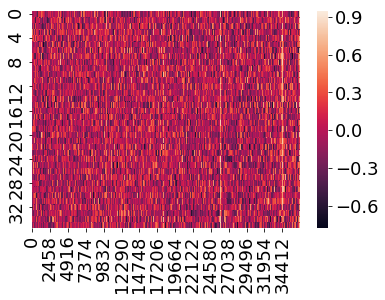

In [15]:
sns.heatmap(sq_corr_intact)

In [16]:
paragraph_data = all_data[conds == 'paragraph']

In [17]:
#corr = np.corrcoef(paragraph_data[10].T)

In [18]:
#corr[np.isnan(corr )]=1

In [19]:
#sns.heatmap(corr)

In [20]:
#np.argwhere(np.isnan(corr))

In [21]:
sq_corr_paragraph = np.array([])
for i in paragraph_data:
    corr = np.corrcoef(i)
    #corr[np.isnan(corr )]=1
    if sq_corr_paragraph.size == 0:
        sq_corr_paragraph = sd.squareform(corr, checks=False)
    else:
        sq_corr_paragraph = np.vstack((sq_corr_paragraph, sd.squareform(corr, checks=False)))

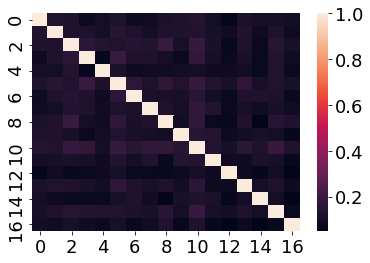

In [22]:
sns.heatmap(np.corrcoef(sq_corr_paragraph))

In [23]:
word_data = all_data[conds == 'word']

In [24]:
sq_corr_word = np.array([])
for i in word_data:
    corr = np.corrcoef(i)
    if sq_corr_word.size == 0:
        sq_corr_word = sd.squareform(corr, checks=False)
    else:
        sq_corr_word = np.vstack((sq_corr_word, sd.squareform(corr, checks=False)))

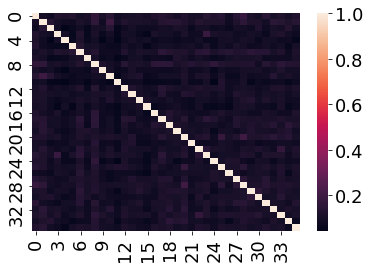

In [25]:
sns.heatmap(np.corrcoef(sq_corr_word))

In [26]:
rest_data = all_data[conds == 'rest']

In [27]:
sq_corr_rest = np.array([])
for i in rest_data:
    corr = np.corrcoef(i)
    if sq_corr_rest.size == 0:
        sq_corr_rest = sd.squareform(corr, checks=False)
    else:
        sq_corr_rest = np.vstack((sq_corr_rest, sd.squareform(corr, checks=False)))

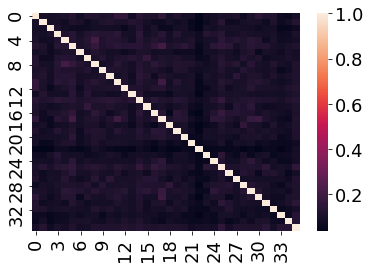

In [28]:
sns.heatmap(np.corrcoef(sq_corr_rest))

In [29]:

def _plot_borderless_clustered(x, factor_bounds=None, factor_colors=None, savefile=None, vmin=-1, vmax=1, width=1000, dpi=100, cmap='Spectral_r'):
    _close_all()
    width *= (1000.0 / 775.0)  # account for border
    height = (775.0 / 755.0) * float(width) * float(x.shape[0]) / float(x.shape[1])  # correct height/width distortion

    fig = plt.figure(figsize=(width / float(dpi), height / float(dpi)), dpi=dpi)

    if len(x.shape) == 2:
        plt.pcolormesh(x, vmin=float(vmin), vmax=float(vmax), cmap=cmap)
    else:
        plt.imshow(x)
    ax = plt.gca()

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    for _, spine in ax.spines.items():
        spine.set_visible(True)

    if factor_bounds:

        ax.hlines(factor_bounds, *ax.get_xlim(), linewidth=2, colors='w')
        ax.vlines(factor_bounds, *ax.get_ylim(), linewidth=2, colors='w')

    if factor_colors:
        for i, f in enumerate(factor_bounds[:-1]):
            rect = patches.Rectangle((f,f), factor_bounds[i+1]-f-1, factor_bounds[i+1]-f-1, linewidth=6, edgecolor=factor_colors[i],facecolor='none', zorder=2)
            ax.add_patch(rect)


    fig.set_frameon(False)

    if not savefile == None:
        fig.savefig(savefile, figsize=(width / float(dpi), height / float(dpi)), bbox_inches='tight', pad_inches=0,
                    dpi=dpi)
    return fig


In [30]:
def _close_all():
    figs = plt.get_fignums()
    for f in figs:
        plt.close(f)

In [31]:
all_stacked = np.vstack((sq_corr_intact, sq_corr_paragraph))
all_stacked = np.vstack((all_stacked, sq_corr_word))
all_stacked = np.vstack((all_stacked, sq_corr_rest))

In [32]:
np.corrcoef(all_stacked)

array([[1.        , 0.11901692, 0.15885721, ..., 0.07470154, 0.08936308,
        0.14264974],
       [0.11901692, 1.        , 0.09247301, ..., 0.08512557, 0.07143552,
        0.10285838],
       [0.15885721, 0.09247301, 1.        , ..., 0.08808006, 0.08578041,
        0.08880611],
       ...,
       [0.07470154, 0.08512557, 0.08808006, ..., 1.        , 0.06954921,
        0.13297686],
       [0.08936308, 0.07143552, 0.08578041, ..., 0.06954921, 1.        ,
        0.13316944],
       [0.14264974, 0.10285838, 0.08880611, ..., 0.13297686, 0.13316944,
        1.        ]])

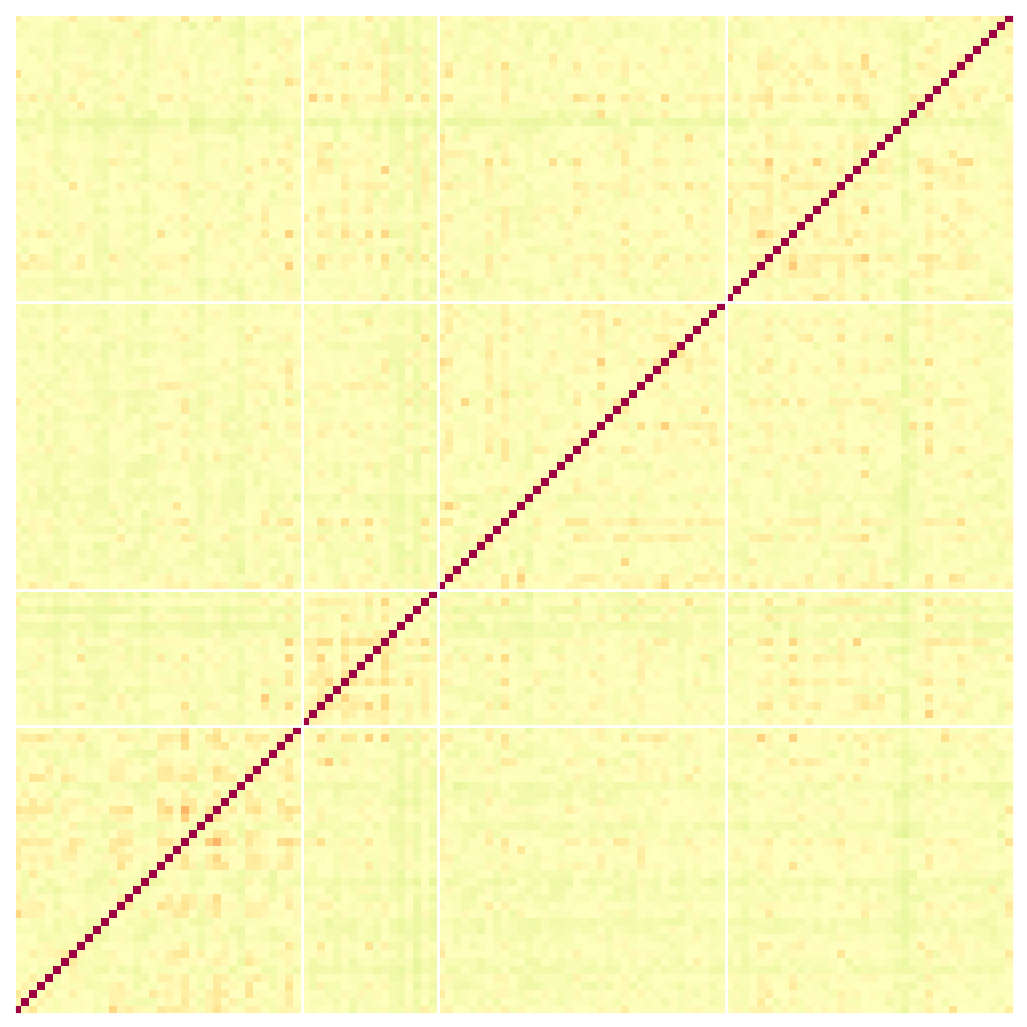

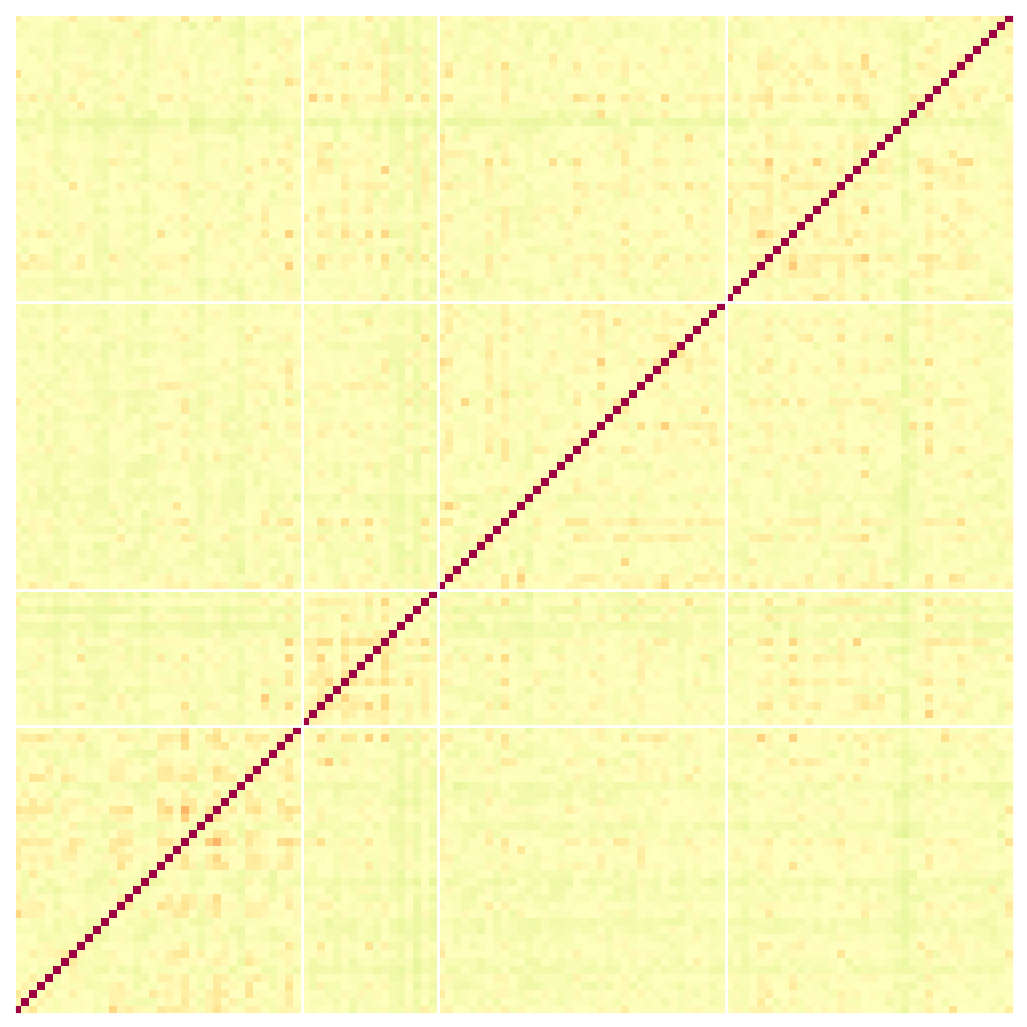

In [36]:
_plot_borderless_clustered(np.corrcoef(all_stacked), factor_bounds=[0, 36, 36+17, 36+17+36, 36+17+36+36], vmin=-.3, vmax=.5)

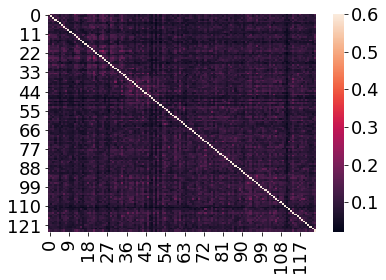

In [ ]:
sns.heatmap(np.corrcoef(all_stacked), vmax=.6)

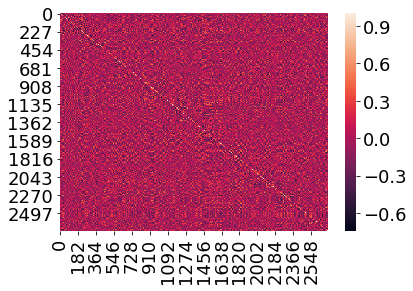

In [ ]:
sns.heatmap(np.corrcoef(np.concatenate(intact_data[:10], axis=0)))

In [ ]:
level_1_intact = np.asarray(tc.timecorr([x for x in intact_data], cfun=cfun, rfun=rfun,
                                                 weights_function=weights_fun, weights_params=weights_params))

In [ ]:
sns.heatmap(np.corrcoef(np.concatenate(level_1_intact[:10], axis=0)))

In [ ]:
level_2_intact = np.asarray(tc.timecorr([x for x in level_1_intact], cfun=cfun, rfun=rfun,
                                                 weights_function=weights_fun, weights_params=weights_params))

In [ ]:
sns.heatmap(np.corrcoef(np.concatenate(level_2_intact[:10], axis=0)))

In [ ]:
paragraph_data = all_data[conds == 'paragraph']

In [ ]:
np.allclose(paragraph_data[9], paragraph_data[3])

In [ ]:
sns.heatmap(np.corrcoef(np.concatenate(paragraph_data[:10], axis=0)))

In [ ]:
level_1_paragraph = np.asarray(tc.timecorr([x for x in paragraph_data], cfun=cfun, rfun=rfun,
                                                 weights_function=weights_fun, weights_params=weights_params))

In [ ]:
sns.heatmap(np.corrcoef(np.concatenate(level_1_paragraph[:10], axis=0)))